In [17]:
using Pkg
Pkg.activate("../alp")
using ProgressBars
include("Env.jl")
include("BaseTypes.jl")
include("DQN.jl")

  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`


  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`
  Activating project at `~/Desktop/RLFinance/alp`


order_action (generic function with 1 method)

In [18]:
PATH = "../data/roman_c1.csv"
PATH_ = "../data/roman_raw.csv"
df = CSV.read(PATH, DataFrame)
EXCLUDE = [ "target","target_min","target_max"]
trading_step = 50
train_env = Env(df[1:10000, :], trading_step, -0.0002, 10, EXCLUDE)
test_env = Env(df[140000:end, :], trading_step, -0.0002, 10, EXCLUDE)

step_ = 0.5
max_ = 3.0
actions = [Iterators.product(step_:step_:max_, step_:step_:max_)...]
pushfirst!(actions, (0.0, 0.0))

dqn = init!(
    in_feats  = length(train_env.real_feats),
    layers    = [1024,256,64],
    eps_start = T(0.9),
    eps_end   = T(0.05),
    eps_decay = 7000,
    rew_decay = 0.8,
    lr        = 1e-10,
    action_space = actions
)

# select!(env.data, Not(EXCLUDE))

# FORMAT = dateformat"yyyy-mm-dd HH:MM:SS.sss"

# l(x) = DateTime(x[1:23], FORMAT)
# df[!, 1] = l.(df.o_ts_recv)
# env.real_feats

DQN(Base.RefValue{Chain}(Chain(Chain([Dense(52 => 1024, relu), Dense(1024 => 256, relu), Dense(256 => 64, relu)]), Dense(64 => 37))), Base.RefValue{Chain}(Chain(Chain([Dense(52 => 1024, relu), Dense(1024 => 256, relu), Dense(256 => 64, relu)]), Dense(64 => 37))), [(0.0, 0.0), (0.5, 0.5), (1.0, 0.5), (1.5, 0.5), (2.0, 0.5), (2.5, 0.5), (3.0, 0.5), (0.5, 1.0), (1.0, 1.0), (1.5, 1.0)  …  (1.5, 2.5), (2.0, 2.5), (2.5, 2.5), (3.0, 2.5), (0.5, 3.0), (1.0, 3.0), (1.5, 3.0), (2.0, 3.0), (2.5, 3.0), (3.0, 3.0)], 0.9, 0.05, 7000, 0.8, 1.0e-10, Dict{String, Vector}("reward" => Any[], "no_actions" => Any[], "loss" => Any[], "vol_left" => Any[]))

In [19]:
old_state = deepcopy(dqn.target_model[])
train_dqn(
    dqn,
    train_env;
    episodes=300,
    max_ep_len=20,
    step_=trading_step-1,
    replay_memory_len=512,
    replay_batch=64
)

new_state = deepcopy(dqn.target_model[])

0.0%┣                                              ┫ 0/300 [00:00<00:00, -0s/it]


Episode 1... randoms: 19, no_action: 0, avg reward: 66.00, avg vol: 0.00 0.3%┣┫ 1/300 [00:01<Inf:Inf, InfGs/it]
Episode 3... randoms: 17, no_action: 1, avg reward: -13.50, avg vol: 2.00 1.0%┣┫ 3/300 [00:01<01:33, 3it/s]


Episode 5... randoms: 18, no_action: 0, avg reward: -191.75, avg vol: 1.00 1.7%┣┫ 5/300 [00:01<00:57, 5it/s]
Episode 7... randoms: 16, no_action: 1, avg reward: 52.50, avg vol: 0.00 2.3%┣┫ 7/300 [00:01<00:41, 7it/s]


Episode 9... randoms: 16, no_action: 2, avg reward: -72.50, avg vol: 1.00 3.0%┣┫ 9/300 [00:01<00:33, 9it/s]


Episode 11... randoms: 15, no_action: 1, avg reward: -45.00, avg vol: 2.00 3.7%┣┫ 11/300 [00:01<00:29, 10it/s]
Episode 13... randoms: 17, no_action: 0, avg reward: 48.75, avg vol: 1.00 4.3%┣┫ 13/300 [00:01<00:26, 11it/s]


Episode 15... randoms: 17, no_action: 2, avg reward: -196.25, avg vol: 1.00 5.0%┣┫ 15/300 [00:01<00:23, 12it/s]


Episode 17... randoms: 17, no_action: 1, avg reward: -192.25, avg vol: -2.00 5.7%┣┫ 17/300 [00:01<00:22, 13it/s]
Episode 19... randoms: 15, no_action: 0, avg reward: 73.00, avg vol: 0.00 6.3%┣┫ 19/300 [00:01<00:20, 14it/s]


Episode 21... randoms: 19, no_action: 0, avg reward: -38.00, avg vol: 2.00 7.0%┣┫ 21/300 [00:01<00:19, 14it/s]


Episode 23... randoms: 16, no_action: 0, avg reward: -2.00, avg vol: 2.00 7.7%┣┫ 23/300 [00:01<00:18, 15it/s]


Episode 24... randoms: 18, no_action: 0, avg reward: -54.00, avg vol: 0.00 8.0%┣┫ 24/300 [00:02<00:20, 14it/s]
Episode 26... randoms: 20, no_action: 2, avg reward: -155.75, avg vol: 3.00 8.7%┣┫ 26/300 [00:02<00:19, 14it/s]


Episode 28... randoms: 17, no_action: 0, avg reward: -12.00, avg vol: 2.00 9.3%┣┫ 28/300 [00:02<00:18, 15it/s]


Episode 30... randoms: 20, no_action: 0, avg reward: -192.75, avg vol: 1.00 10.0%┣┫ 30/300 [00:02<00:18, 15it/s]
Episode 32... randoms: 13, no_action: 0, avg reward: -212.50, avg vol: -3.00 10.7%┣┫ 32/300 [00:02<00:17, 16it/s]


Episode 34... randoms: 16, no_action: 0, avg reward: -57.50, avg vol: 0.00 11.3%┣┫ 34/300 [00:02<00:16, 16it/s]


Episode 36... randoms: 18, no_action: 2, avg reward: -46.50, avg vol: 2.00 12.0%┣┫ 36/300 [00:02<00:16, 17it/s]
Episode 38... randoms: 15, no_action: 0, avg reward: -16.00, avg vol: 2.00 12.7%┣┫ 38/300 [00:02<00:15, 17it/s]


Episode 40... randoms: 19, no_action: 1, avg reward: -189.25, avg vol: 1.00 13.3%┣┫ 40/300 [00:02<00:15, 17it/s]


Episode 42... randoms: 14, no_action: 1, avg reward: -190.75, avg vol: -2.00 14.0%┣┫ 42/300 [00:02<00:15, 18it/s]


Episode 43... randoms: 16, no_action: 0, avg reward: -13.00, avg vol: 2.00 14.3%┣┫ 43/300 [00:03<00:16, 17it/s]
Episode 45... randoms: 17, no_action: 0, avg reward: -73.50, avg vol: 0.00 15.0%┣┫ 45/300 [00:03<00:15, 17it/s]


Episode 47... randoms: 16, no_action: 1, avg reward: 66.50, avg vol: 0.00 15.7%┣┫ 47/300 [00:03<00:15, 17it/s]


Episode 49... randoms: 18, no_action: 0, avg reward: -53.50, avg vol: 0.00 16.3%┣┫ 49/300 [00:03<00:14, 17it/s]
Episode 51... randoms: 19, no_action: 0, avg reward: -144.75, avg vol: 3.00 17.0%┣┫ 51/300 [00:03<00:14, 18it/s]


Episode 53... randoms: 16, no_action: 1, avg reward: -16.25, avg vol: 1.00 17.7%┣┫ 53/300 [00:03<00:14, 18it/s]


Episode 55... randoms: 15, no_action: 3, avg reward: -316.75, avg vol: 3.00 18.3%┣┫ 55/300 [00:03<00:14, 18it/s]
Episode 57... randoms: 17, no_action: 3, avg reward: -233.00, avg vol: -3.00 19.0%┣┫ 57/300 [00:03<00:13, 18it/s]


Episode 59... randoms: 15, no_action: 1, avg reward: -57.00, avg vol: 0.00 19.7%┣┫ 59/300 [00:03<00:13, 19it/s]


Episode 61... randoms: 16, no_action: 2, avg reward: -156.75, avg vol: 3.00 20.3%┣┫ 61/300 [00:03<00:13, 19it/s]


Episode 62... randoms: 16, no_action: 1, avg reward: -193.75, avg vol: -2.00 20.7%┣┫ 62/300 [00:03<00:13, 18it/s]
Episode 64... randoms: 16, no_action: 0, avg reward: -62.50, avg vol: 0.00 21.3%┣┫ 64/300 [00:03<00:13, 18it/s]


Episode 66... randoms: 11, no_action: 2, avg reward: -41.50, avg vol: 2.00 22.0%┣┫ 66/300 [00:04<00:13, 18it/s]


Episode 68... randoms: 15, no_action: 0, avg reward: -15.00, avg vol: 2.00 22.7%┣┫ 68/300 [00:04<00:13, 18it/s]
Episode 70... randoms: 16, no_action: 0, avg reward: -211.75, avg vol: 1.00 23.3%┣┫ 70/300 [00:04<00:12, 19it/s]


Episode 72... randoms: 15, no_action: 0, avg reward: -182.25, avg vol: -2.00 24.0%┣┫ 72/300 [00:04<00:12, 19it/s]


Episode 74... randoms: 15, no_action: 0, avg reward: -62.00, avg vol: 0.00 24.7%┣┫ 74/300 [00:04<00:12, 19it/s]
Episode 76... randoms: 15, no_action: 1, avg reward: 56.00, avg vol: 0.00 25.3%┣┫ 76/300 [00:04<00:12, 19it/s]


Episode 78... randoms: 18, no_action: 0, avg reward: -18.50, avg vol: 2.00 26.0%┣┫ 78/300 [00:04<00:12, 19it/s]


Episode 80... randoms: 14, no_action: 1, avg reward: -216.75, avg vol: 1.00 26.7%┣┫ 80/300 [00:04<00:11, 19it/s]


Episode 81... randoms: 14, no_action: 0, avg reward: -45.00, avg vol: 2.00 27.0%┣┫ 81/300 [00:04<00:12, 19it/s]
Episode 83... randoms: 14, no_action: 0, avg reward: -22.50, avg vol: 2.00 27.7%┣┫ 83/300 [00:04<00:12, 19it/s]


Episode 85... randoms: 14, no_action: 2, avg reward: -84.50, avg vol: 0.00 28.3%┣┫ 85/300 [00:04<00:11, 19it/s]


Episode 87... randoms: 15, no_action: 1, avg reward: -206.25, avg vol: -2.00 29.0%┣┫ 87/300 [00:05<00:11, 19it/s]
Episode 89... randoms: 15, no_action: 1, avg reward: 60.00, avg vol: -1.00 29.7%┣┫ 89/300 [00:05<00:11, 19it/s]


Episode 91... randoms: 13, no_action: 0, avg reward: -132.50, avg vol: 2.00 30.3%┣┫ 91/300 [00:05<00:11, 19it/s]


Episode 93... randoms: 11, no_action: 1, avg reward: -31.00, avg vol: 2.00 31.0%┣┫ 93/300 [00:05<00:11, 19it/s]
Episode 95... randoms: 14, no_action: 1, avg reward: -338.00, avg vol: 2.00 31.7%┣┫ 95/300 [00:05<00:10, 20it/s]


Episode 97... randoms: 15, no_action: 1, avg reward: -215.50, avg vol: -3.00 32.3%┣┫ 97/300 [00:05<00:10, 20it/s]


Episode 99... randoms: 17, no_action: 1, avg reward: -57.50, avg vol: 1.00 33.0%┣┫ 99/300 [00:05<00:10, 20it/s]


Episode 100... randoms: 15, no_action: 1, avg reward: -213.25, avg vol: 1.00 33.3%┣┫ 100/300 [00:05<00:10, 19it/s]
Episode 102... randoms: 11, no_action: 1, avg reward: -209.00, avg vol: -3.00 34.0%┣┫ 102/300 [00:05<00:10, 19it/s]


Episode 104... randoms: 14, no_action: 1, avg reward: 60.00, avg vol: -1.00 34.7%┣┫ 104/300 [00:05<00:10, 19it/s]


Episode 106... randoms: 14, no_action: 2, avg reward: -45.50, avg vol: 2.00 35.3%┣┫ 106/300 [00:05<00:10, 20it/s]
Episode 108... randoms: 14, no_action: 1, avg reward: -23.50, avg vol: 2.00 36.0%┣┫ 108/300 [00:05<00:10, 20it/s]


Episode 110... randoms: 12, no_action: 2, avg reward: -209.25, avg vol: 1.00 36.7%┣┫ 110/300 [00:06<00:10, 20it/s]


Episode 112... randoms: 11, no_action: 2, avg reward: -1.75, avg vol: -1.00 37.3%┣┫ 112/300 [00:06<00:09, 20it/s]
Episode 114... randoms: 17, no_action: 2, avg reward: 68.00, avg vol: -1.00 38.0%┣┫ 114/300 [00:06<00:09, 20it/s]


Episode 116... randoms: 14, no_action: 1, avg reward: -19.25, avg vol: 1.00 38.7%┣┫ 116/300 [00:06<00:09, 20it/s]


Episode 118... randoms: 14, no_action: 1, avg reward: 54.25, avg vol: 1.00 39.3%┣┫ 118/300 [00:06<00:09, 20it/s]


Episode 119... randoms: 13, no_action: 1, avg reward: 76.50, avg vol: 0.00 39.7%┣┫ 119/300 [00:06<00:09, 20it/s]
Episode 121... randoms: 16, no_action: 1, avg reward: -12.25, avg vol: 1.00 40.3%┣┫ 121/300 [00:06<00:09, 20it/s]


Episode 123... randoms: 15, no_action: 1, avg reward: 47.75, avg vol: 1.00 41.0%┣┫ 123/300 [00:06<00:09, 20it/s]


Episode 125... randoms: 14, no_action: 1, avg reward: -206.75, avg vol: 1.00 41.7%┣┫ 125/300 [00:06<00:09, 20it/s]
Episode 127... randoms: 12, no_action: 1, avg reward: -188.25, avg vol: -2.00 42.3%┣┫ 127/300 [00:06<00:09, 20it/s]


Episode 129... randoms: 13, no_action: 1, avg reward: -53.50, avg vol: 1.00 43.0%┣┫ 129/300 [00:06<00:09, 20it/s]


Episode 131... randoms: 11, no_action: 1, avg reward: -41.50, avg vol: 2.00 43.7%┣┫ 131/300 [00:06<00:08, 20it/s]
Episode 133... randoms: 15, no_action: 1, avg reward: 59.25, avg vol: 1.00 44.3%┣┫ 133/300 [00:07<00:08, 20it/s]


Episode 135... randoms: 10, no_action: 1, avg reward: -219.25, avg vol: 1.00 45.0%┣┫ 135/300 [00:07<00:08, 20it/s]


Episode 137... randoms: 11, no_action: 0, avg reward: -186.75, avg vol: -2.00 45.7%┣┫ 137/300 [00:07<00:08, 20it/s]


Episode 138... randoms: 12, no_action: 0, avg reward: 47.25, avg vol: 1.00 46.0%┣┫ 138/300 [00:07<00:08, 20it/s]
Episode 140... randoms: 11, no_action: 3, avg reward: -70.50, avg vol: 0.00 46.7%┣┫ 140/300 [00:07<00:08, 20it/s]


Episode 142... randoms: 9, no_action: 0, avg reward: 11.25, avg vol: -1.00 47.3%┣┫ 142/300 [00:07<00:08, 20it/s]


Episode 144... randoms: 12, no_action: 1, avg reward: 69.00, avg vol: -1.00 48.0%┣┫ 144/300 [00:07<00:08, 20it/s]
Episode 146... randoms: 13, no_action: 0, avg reward: -40.50, avg vol: 2.00 48.7%┣┫ 146/300 [00:07<00:08, 20it/s]


Episode 148... randoms: 13, no_action: 1, avg reward: -17.00, avg vol: 2.00 49.3%┣┫ 148/300 [00:07<00:08, 20it/s]


Episode 150... randoms: 12, no_action: 0, avg reward: -69.50, avg vol: 0.00 50.0%┣┫ 150/300 [00:07<00:07, 20it/s]
Episode 152... randoms: 13, no_action: 1, avg reward: -191.25, avg vol: -2.00 50.7%┣┫ 152/300 [00:07<00:07, 20it/s]


Episode 154... randoms: 11, no_action: 0, avg reward: 70.00, avg vol: -1.00 51.3%┣┫ 154/300 [00:07<00:07, 20it/s]


Episode 156... randoms: 9, no_action: 0, avg reward: -146.25, avg vol: 3.00 52.0%┣┫ 156/300 [00:08<00:07, 21it/s]


Episode 157... randoms: 13, no_action: 3, avg reward: -198.75, avg vol: -2.00 52.3%┣┫ 157/300 [00:08<00:07, 20it/s]
Episode 159... randoms: 11, no_action: 0, avg reward: 63.50, avg vol: -1.00 53.0%┣┫ 159/300 [00:08<00:07, 20it/s]


Episode 161... randoms: 14, no_action: 1, avg reward: -48.50, avg vol: 2.00 53.7%┣┫ 161/300 [00:08<00:07, 20it/s]


Episode 163... randoms: 10, no_action: 2, avg reward: 42.25, avg vol: 1.00 54.3%┣┫ 163/300 [00:08<00:07, 20it/s]
Episode 165... randoms: 9, no_action: 0, avg reward: -210.75, avg vol: 1.00 55.0%┣┫ 165/300 [00:08<00:07, 20it/s]


Episode 167... randoms: 12, no_action: 0, avg reward: -176.25, avg vol: -2.00 55.7%┣┫ 167/300 [00:08<00:07, 20it/s]


Episode 169... randoms: 12, no_action: 0, avg reward: -49.50, avg vol: 0.00 56.3%┣┫ 169/300 [00:08<00:06, 20it/s]
Episode 171... randoms: 11, no_action: 1, avg reward: -141.25, avg vol: 3.00 57.0%┣┫ 171/300 [00:08<00:06, 21it/s]


Episode 173... randoms: 11, no_action: 0, avg reward: -13.00, avg vol: 2.00 57.7%┣┫ 173/300 [00:08<00:06, 21it/s]


Episode 175... randoms: 8, no_action: 1, avg reward: -48.00, avg vol: 0.00 58.3%┣┫ 175/300 [00:08<00:06, 21it/s]


Episode 176... randoms: 15, no_action: 2, avg reward: -36.50, avg vol: 2.00 58.7%┣┫ 176/300 [00:09<00:06, 20it/s]
Episode 178... randoms: 9, no_action: 0, avg reward: 67.25, avg vol: 1.00 59.3%┣┫ 178/300 [00:09<00:06, 20it/s]


Episode 180... randoms: 9, no_action: 1, avg reward: -200.25, avg vol: 1.00 60.0%┣┫ 180/300 [00:09<00:06, 20it/s]


Episode 182... randoms: 11, no_action: 0, avg reward: -185.75, avg vol: -2.00 60.7%┣┫ 182/300 [00:09<00:06, 20it/s]
Episode 184... randoms: 10, no_action: 1, avg reward: -53.50, avg vol: 0.00 61.3%┣┫ 184/300 [00:09<00:06, 21it/s]


Episode 186... randoms: 9, no_action: 0, avg reward: -23.50, avg vol: 2.00 62.0%┣┫ 186/300 [00:09<00:06, 21it/s]


Episode 188... randoms: 10, no_action: 0, avg reward: -3.00, avg vol: 2.00 62.7%┣┫ 188/300 [00:09<00:05, 21it/s]
Episode 190... randoms: 11, no_action: 2, avg reward: 10.75, avg vol: -1.00 63.3%┣┫ 190/300 [00:09<00:05, 21it/s]


Episode 192... randoms: 11, no_action: 0, avg reward: -0.25, avg vol: -1.00 64.0%┣┫ 192/300 [00:09<00:05, 21it/s]


Episode 194... randoms: 9, no_action: 1, avg reward: -65.50, avg vol: 0.00 64.7%┣┫ 194/300 [00:09<00:05, 21it/s]


Episode 196... randoms: 8, no_action: 1, avg reward: -18.25, avg vol: 1.00 65.3%┣┫ 196/300 [00:10<00:05, 20it/s]
Episode 198... randoms: 7, no_action: 0, avg reward: 49.25, avg vol: 1.00 66.0%┣┫ 198/300 [00:10<00:05, 20it/s]


Episode 200... randoms: 13, no_action: 0, avg reward: -67.00, avg vol: 0.00 66.7%┣┫ 200/300 [00:10<00:05, 21it/s]


Episode 202... randoms: 5, no_action: 1, avg reward: -218.00, avg vol: -3.00 67.3%┣┫ 202/300 [00:10<00:05, 21it/s]
Episode 204... randoms: 12, no_action: 0, avg reward: -59.00, avg vol: 1.00 68.0%┣┫ 204/300 [00:10<00:05, 21it/s]


Episode 206... randoms: 7, no_action: 1, avg reward: -148.25, avg vol: 3.00 68.7%┣┫ 206/300 [00:10<00:05, 21it/s]


Episode 208... randoms: 8, no_action: 0, avg reward: 57.25, avg vol: 1.00 69.3%┣┫ 208/300 [00:10<00:04, 21it/s]
Episode 210... randoms: 12, no_action: 1, avg reward: -68.00, avg vol: 0.00 70.0%┣┫ 210/300 [00:10<00:04, 21it/s]


Episode 212... randoms: 14, no_action: 1, avg reward: -115.00, avg vol: -1.00 70.7%┣┫ 212/300 [00:10<00:04, 21it/s]


Episode 214... randoms: 9, no_action: 0, avg reward: -58.50, avg vol: 1.00 71.3%┣┫ 214/300 [00:10<00:04, 21it/s]


Episode 215... randoms: 12, no_action: 2, avg reward: -67.50, avg vol: 0.00 71.7%┣┫ 215/300 [00:10<00:04, 21it/s]
Episode 217... randoms: 11, no_action: 0, avg reward: -184.75, avg vol: -2.00 72.3%┣┫ 217/300 [00:10<00:04, 21it/s]


Episode 219... randoms: 12, no_action: 1, avg reward: -59.00, avg vol: 0.00 73.0%┣┫ 219/300 [00:11<00:04, 21it/s]


Episode 221... randoms: 8, no_action: 0, avg reward: -134.75, avg vol: 3.00 73.7%┣┫ 221/300 [00:11<00:04, 21it/s]
Episode 223... randoms: 15, no_action: 0, avg reward: -17.50, avg vol: 2.00 74.3%┣┫ 223/300 [00:11<00:04, 21it/s]


Episode 225... randoms: 11, no_action: 3, avg reward: 14.75, avg vol: -1.00 75.0%┣┫ 225/300 [00:11<00:04, 21it/s]


Episode 227... randoms: 12, no_action: 1, avg reward: -189.25, avg vol: -2.00 75.7%┣┫ 227/300 [00:11<00:04, 21it/s]
Episode 229... randoms: 15, no_action: 1, avg reward: 69.00, avg vol: -1.00 76.3%┣┫ 229/300 [00:11<00:03, 21it/s]


Episode 231... randoms: 7, no_action: 0, avg reward: 77.00, avg vol: 0.00 77.0%┣┫ 231/300 [00:11<00:03, 21it/s]


Episode 233... randoms: 10, no_action: 0, avg reward: 59.75, avg vol: 1.00 77.7%┣┫ 233/300 [00:11<00:03, 21it/s]


Episode 234... randoms: 10, no_action: 0, avg reward: -55.00, avg vol: 0.00 78.0%┣┫ 234/300 [00:11<00:03, 21it/s]
Episode 236... randoms: 11, no_action: 0, avg reward: 56.50, avg vol: 0.00 78.7%┣┫ 236/300 [00:11<00:03, 21it/s]


Episode 238... randoms: 11, no_action: 0, avg reward: -21.00, avg vol: 2.00 79.3%┣┫ 238/300 [00:11<00:03, 21it/s]


Episode 240... randoms: 12, no_action: 1, avg reward: -185.75, avg vol: 1.00 80.0%┣┫ 240/300 [00:12<00:03, 21it/s]
Episode 242... randoms: 11, no_action: 0, avg reward: -177.25, avg vol: -2.00 80.7%┣┫ 242/300 [00:12<00:03, 21it/s]


Episode 244... randoms: 7, no_action: 0, avg reward: -38.50, avg vol: 0.00 81.3%┣┫ 244/300 [00:12<00:03, 21it/s]


Episode 246... randoms: 12, no_action: 1, avg reward: -143.25, avg vol: 3.00 82.0%┣┫ 246/300 [00:12<00:03, 21it/s]
Episode 248... randoms: 7, no_action: 0, avg reward: -3.50, avg vol: 2.00 82.7%┣┫ 248/300 [00:12<00:02, 21it/s]


Episode 250... randoms: 12, no_action: 0, avg reward: -201.25, avg vol: 1.00 83.3%┣┫ 250/300 [00:12<00:02, 21it/s]


Episode 252... randoms: 12, no_action: 0, avg reward: -211.50, avg vol: -3.00 84.0%┣┫ 252/300 [00:12<00:02, 21it/s]


Episode 253... randoms: 8, no_action: 0, avg reward: 63.25, avg vol: 1.00 84.3%┣┫ 253/300 [00:12<00:02, 21it/s]
Episode 255... randoms: 12, no_action: 1, avg reward: -63.50, avg vol: 0.00 85.0%┣┫ 255/300 [00:12<00:02, 21it/s]


Episode 257... randoms: 8, no_action: 1, avg reward: -191.25, avg vol: -2.00 85.7%┣┫ 257/300 [00:12<00:02, 21it/s]


Episode 259... randoms: 7, no_action: 0, avg reward: 76.00, avg vol: -1.00 86.3%┣┫ 259/300 [00:12<00:02, 21it/s]
Episode 261... randoms: 7, no_action: 0, avg reward: -112.50, avg vol: 2.00 87.0%┣┫ 261/300 [00:12<00:02, 21it/s]


Episode 263... randoms: 12, no_action: 0, avg reward: 67.75, avg vol: 1.00 87.7%┣┫ 263/300 [00:13<00:02, 21it/s]


Episode 265... randoms: 6, no_action: 0, avg reward: -326.50, avg vol: 2.00 88.3%┣┫ 265/300 [00:13<00:02, 21it/s]
Episode 267... randoms: 6, no_action: 0, avg reward: -203.50, avg vol: -3.00 89.0%┣┫ 267/300 [00:13<00:02, 21it/s]


Episode 269... randoms: 9, no_action: 0, avg reward: -60.00, avg vol: 1.00 89.7%┣┫ 269/300 [00:13<00:01, 21it/s]


Episode 271... randoms: 4, no_action: 0, avg reward: -74.00, avg vol: 2.00 90.3%┣┫ 271/300 [00:13<00:01, 21it/s]


Episode 272... randoms: 13, no_action: 0, avg reward: 70.00, avg vol: 0.00 90.7%┣┫ 272/300 [00:13<00:01, 21it/s]
Episode 274... randoms: 11, no_action: 1, avg reward: -65.50, avg vol: 0.00 91.3%┣┫ 274/300 [00:13<00:01, 21it/s]


Episode 276... randoms: 7, no_action: 1, avg reward: -34.50, avg vol: 2.00 92.0%┣┫ 276/300 [00:13<00:01, 21it/s]


Episode 278... randoms: 8, no_action: 0, avg reward: -5.50, avg vol: 2.00 92.7%┣┫ 278/300 [00:13<00:01, 21it/s]
Episode 280... randoms: 9, no_action: 0, avg reward: -323.00, avg vol: 2.00 93.3%┣┫ 280/300 [00:13<00:01, 21it/s]


Episode 282... randoms: 6, no_action: 1, avg reward: -185.75, avg vol: -2.00 94.0%┣┫ 282/300 [00:13<00:01, 21it/s]


Episode 284... randoms: 9, no_action: 1, avg reward: 78.50, avg vol: 0.00 94.7%┣┫ 284/300 [00:13<00:01, 21it/s]
Episode 286... randoms: 6, no_action: 0, avg reward: -72.50, avg vol: 2.00 95.3%┣┫ 286/300 [00:14<00:01, 21it/s]


Episode 288... randoms: 12, no_action: 0, avg reward: -34.00, avg vol: 2.00 96.0%┣┫ 288/300 [00:14<00:01, 21it/s]


Episode 290... randoms: 7, no_action: 0, avg reward: -75.00, avg vol: 0.00 96.7%┣┫ 290/300 [00:14<00:00, 21it/s]


Episode 291... randoms: 10, no_action: 0, avg reward: -54.50, avg vol: 2.00 97.0%┣┫ 291/300 [00:14<00:00, 21it/s]
Episode 293... randoms: 8, no_action: 0, avg reward: -40.00, avg vol: 2.00 97.7%┣┫ 293/300 [00:14<00:00, 21it/s]


Episode 295... randoms: 7, no_action: 0, avg reward: -49.00, avg vol: 0.00 98.3%┣┫ 295/300 [00:14<00:00, 21it/s]


Episode 297... randoms: 8, no_action: 0, avg reward: -175.25, avg vol: -2.00 99.0%┣┫ 297/300 [00:14<00:00, 21it/s]
Episode 299... randoms: 10, no_action: 0, avg reward: 95.00, avg vol: -1.00 99.7%┣┫ 299/300 [00:14<00:00, 21it/s]


Episode 300... randoms: 10, no_action: 1, avg reward: -227.75, avg vol: 1.00 100.0%┣┫ 300/300 [00:14<00:00, 21it/s]
Episode 300... randoms: 10, no_action: 1, avg reward: -227.75, avg vol: 1.00 100.0%┣┫ 300/300 [00:14<00:00, 21it/s]


Chain(
  Chain([
    Dense(52 => 1024, relu),            # 54_272 parameters
    Dense(1024 => 256, relu),           # 262_400 parameters
    Dense(256 => 64, relu),             # 16_448 parameters
  ]),
  Dense(64 => 37),                      # 2_405 parameters
)                   # Total: 8 arrays, 335_525 parameters, 1.280 MiB.

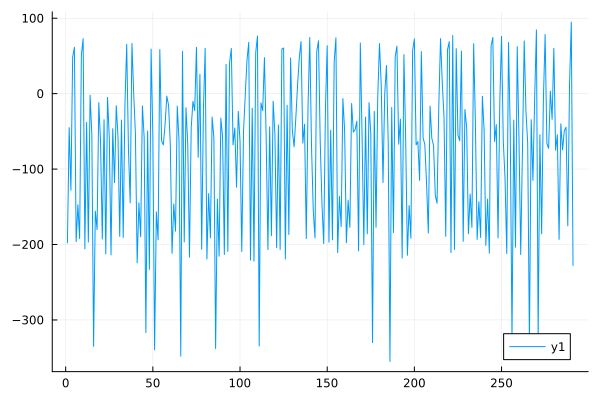

In [21]:
using Plots
plot(dqn.stats["reward"][10:end])
# plot(train_env.data.PnL)

In [14]:
move(dqn, true, false)
res = simulate!(test_env, order_action, trading_step-1, dqn)

Dict{String, Vector{Any}} with 2 entries:
  "reward"          => [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, -76.25, 5.0, -21.75, 5.0 …
  "executed_orders" => [2, 2, 2, 2, 2, 2, 1, 2, 1, 2  …  2, 2, 2, 2, 1, 2, 2, 2…

In [ ]:
bar = ProgressBar(1:10)
for i in bar
    a = 2
end

In [39]:
state = [get_state(train_env)...]
dqn.target_model[](state)

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(51 => 1024, relu)
│   summary(x) = 51-element Vector{Float64}
└ @ Flux /home/thornail/.julia/packages/Flux/u7QSl/src/layers/stateless.jl:60


17-element Vector{Float32}:
  0.0076960856
 -0.013330121
  0.0075357277
 -0.0040694335
  0.0054663923
 -0.0061998013
  1.3539363f-5
 -0.021925833
  0.0071932105
 -0.00473842
 -0.024946695
  0.0016213995
 -0.037677307
  0.0075936895
  0.0076921256
  0.0074884067
 -0.0023112514

In [36]:
count = 0
thrr = 60
for n in res["reward"]
    (n > thrr) && (count += 1)
end
count

0

In [37]:
T_ = 100
SIGMA_NAME = "vol_ws2500_midprice_vwap_v130000.0"
function baseline(env, state, kwargs)
    delta = state[SIGMA_NAME] / 10000 * sqrt(T_)
    input_order(env, Order(true, 1.0, state["midprice"] + delta))
    input_order(env, Order(false, 1.0, state["midprice"] - delta))
end

res_base = simulate!(train_env, baseline, 99, nothing)

Dict{String, Vector{Any}} with 2 entries:
  "reward"          => [12.1654, -0.17184, 0.53272, -42.0537, 12.1518, 6.59235,…
  "executed_orders" => [2, 1, 1, 1, 2, 1, 2, 2, 2, 2  …  1, 1, 2, 2, 1, 1, 1, 2…

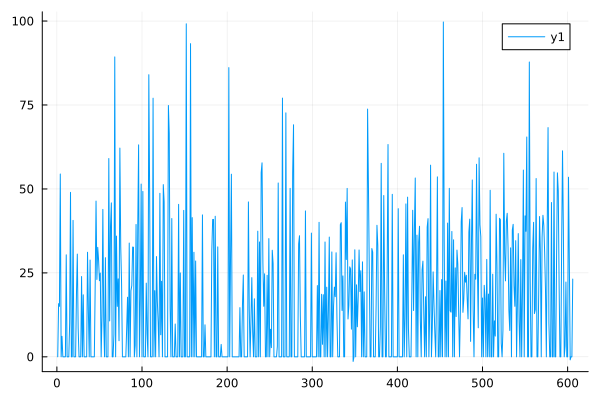

In [45]:
plot(res_base["reward"])

In [29]:
include("BaseTypes.jl")

orders = [
    Order(true, 1.0, 130),
    Order(false, 1.0, 110)
]

res = match_orders!(
    orders=orders, best_ask = 131.0, best_bid = 109.0
)


  Activating project at `~/Desktop/RLFinance/alp`


MatchRes(0.0, 20.0, 2)